<a href="https://colab.research.google.com/github/Madhu-712/Transfer-Learning/blob/master/Transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [59]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'drive/MyDrive/Datasets/Train'
valid_path = 'drive/MyDrive/Datasets/Test'

In [58]:
train_path

'drive/MyDrive/Datasets/Train'

In [60]:
valid_path

'drive/MyDrive/Datasets/Test'

In [61]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [62]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [63]:
# useful for getting number of classes
folders = glob('drive/MyDrive/Datasets/Train/*')

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
folders

['drive/MyDrive/Datasets/Train/Dog', 'drive/MyDrive/Datasets/Train/Cat']

In [66]:
len(folders)

2

In [68]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(10, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [69]:
prediction

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_5')>

In [70]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [71]:
model

In [72]:
# view the structure of the model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [73]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [74]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [78]:
train_datagen

In [76]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [77]:
train_datagen

In [79]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [80]:
training_set = train_datagen.flow_from_directory('drive/MyDrive/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 30 images belonging to 2 classes.


In [81]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 28 images belonging to 2 classes.


In [82]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 28 images belonging to 2 classes.


In [83]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
1/1 [==============================] - 36s 36s/step - loss: 0.7483 - accuracy: 0.4667 - val_loss: 1.8948 - val_accuracy: 0.5357
Epoch 2/5
1/1 [==============================] - 31s 31s/step - loss: 1.9405 - accuracy: 0.5000 - val_loss: 0.4805 - val_accuracy: 0.7857
Epoch 3/5
1/1 [==============================] - 30s 30s/step - loss: 0.3833 - accuracy: 0.9000 - val_loss: 1.1002 - val_accuracy: 0.4643
Epoch 4/5
1/1 [==============================] - 30s 30s/step - loss: 0.8426 - accuracy: 0.5333 - val_loss: 0.5509 - val_accuracy: 0.7143
Epoch 5/5
1/1 [==============================] - 30s 30s/step - loss: 0.4026 - accuracy: 0.8000 - val_loss: 0.3192 - val_accuracy: 0.8571


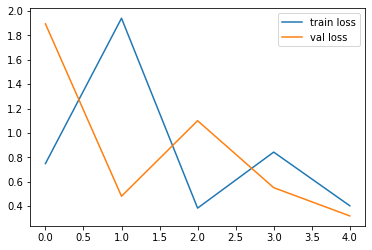

<Figure size 432x288 with 0 Axes>

In [84]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

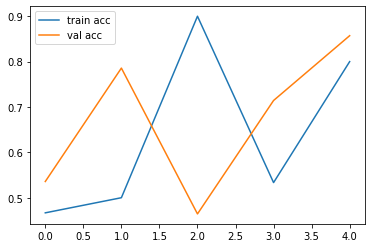

<Figure size 432x288 with 0 Axes>

In [86]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [87]:
import tensorflow as tf

from keras.models import load_model

model.save('transferlearning_model.h5')